In [48]:
import time

from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By

In [49]:
driver = Chrome()
driver.get("https://books.toscrape.com/")

In [50]:
last_height = driver.execute_script("return document.body.scrollHeight;")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    time.sleep(3)

    new_height = driver.execute_script("return document.body.scrollHeight;")

    if new_height == last_height:
        break
    last_height = new_height

In [51]:
categoryLinksUl = driver.find_element(By.CLASS_NAME, "nav-list" )
categoryListItems = categoryLinksUl.find_elements(By.TAG_NAME, "li")
categoryLinks = [ listItem.find_element(By.TAG_NAME, "a") for listItem in categoryListItems ]
categoryLinksUrl = [ categoryLink.get_property("href") for categoryLink in categoryLinks ]
categoryNames = [ categoryLink.text for categoryLink in categoryLinks ]

In [52]:
books_by_category = {}

for i in range(len(categoryNames)):
    if i > 4:
        break

    category_url = categoryLinksUrl[i+1]
    driver.get(category_url)
    books = []

    while True:
        booksDivs = driver.find_elements(By.CLASS_NAME, "product_pod")
        booksH3 = [bookDiv.find_element(By.TAG_NAME, "h3") for bookDiv in booksDivs]
        books += [bookH3.find_element(By.TAG_NAME, "a").text for bookH3 in booksH3]

        try:
            next_button = driver.find_element(By.CLASS_NAME, "next").find_element(By.TAG_NAME, "a")
            next_page_url = next_button.get_property("href")
            time.sleep(3)
            driver.get(next_page_url)
        except:
            break

    books_by_category[categoryNames[i+1]] = books

driver.quit()

In [54]:
import pandas as pd

data = []
for category, books in books_by_category.items():
    for book in books:
        data.append({"Category": category, "Book Title": book})

df = pd.DataFrame(data)

print(df)

     Category                          Book Title
0      Travel             It's Only the Himalayas
1      Travel           Full Moon over Noah’s ...
2      Travel      See America: A Celebration ...
3      Travel  Vagabonding: An Uncommon Guide ...
4      Travel                Under the Tuscan Sun
..        ...                                 ...
158  Classics                   The Little Prince
159  Classics               Sense and Sensibility
160  Classics                     Of Mice and Men
161  Classics                                Emma
162  Classics    Alice in Wonderland (Alice's ...

[163 rows x 2 columns]


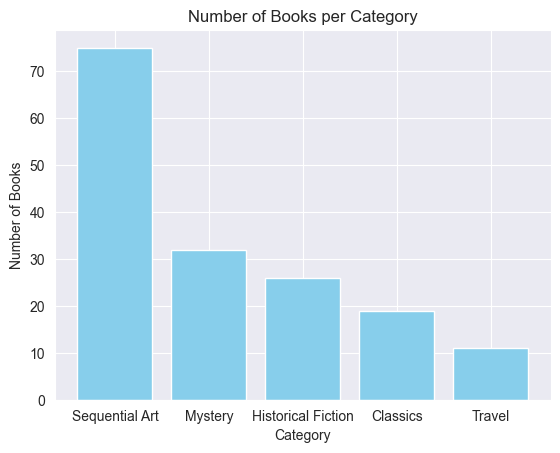

In [55]:
import matplotlib.pyplot as plt

category_counts = df['Category'].value_counts()

plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('Number of Books per Category')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.show()